In [2]:
'''
IPython提供了许多魔法命令，使得在IPython环境中的操作更加得心应手。
魔法命令都以%或者%%开头，以%开头的成为行命令，%%开头的称为单元命令。
行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。
'''
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pwd   path
fmouse_path = "data/mouse_drug_data.csv"
fdrug_path =  "data/clinicaltrial_data.csv"
df_mouse = pd.read_csv(fmouse_path)
df_mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
df_drug = pd.read_csv(fdrug_path)
df_drug.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
df_merge = pd.merge(df_mouse,df_drug,on='Mouse ID',how = 'inner')
print(len(df_merge))
df_merge.head()

1906


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment  (mean, sd, lines chart, errorbar chart)

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_by = df_merge.groupby(['Drug','Timepoint'])
# Convert to DataFrame 
group= group_by[['Tumor Volume (mm3)']].mean()  #one bracket come to a series, double come to a df
group.reset_index(inplace=True)
group.head()
 


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint # Convert to DataFrame [[]]
std_er = group_by[['Tumor Volume (mm3)']].sem()
# Preview DataFrame
std_er =std_er.reset_index()
std_er.head()
#std_er[std_er['Drug']=='Capomulin']['Tumor Volume (mm3)']

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
format_group = group.pivot(index = 'Timepoint',columns = 'Drug',values = 'Tumor Volume (mm3)')
format_group.head()
# Preview that Reformatting worked
#format_group.index


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


[Text(0,0.5,'Tumor Volumes(mm3)'),
 Text(0.5,0,'Time(Days)'),
 Text(0.5,1,'Tumor response to treatment')]

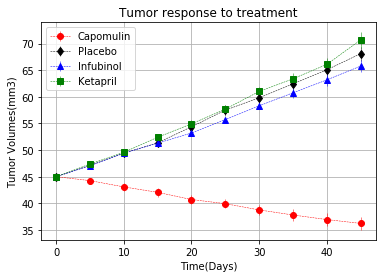

In [9]:
fig,ax = plt.subplots() # if it was plt.subplot, then an error occur
a= plt.errorbar(format_group.index,format_group["Capomulin"],
                yerr =std_er[std_er['Drug']=='Capomulin']['Tumor Volume (mm3)'],
                marker='o',linestyle='dashed',c='r',linewidth=0.5)
# Don't know how to plot errorbar with muti-categories.
# resource:https://stackoverflow.com/search?q=Plotting+error+bars+with+multi-categories+in+matplotlib%2C+using+pandas+data+frame
d= plt.errorbar(format_group.index,format_group["Placebo"],
                yerr =std_er[std_er['Drug']=='Placebo']['Tumor Volume (mm3)'],
                marker='d',c='k',linestyle='dashed',linewidth=0.5)
b=plt.errorbar(format_group.index,format_group["Infubinol"],
               yerr =std_er[std_er['Drug']=='Infubinol']['Tumor Volume (mm3)']
               ,marker='^',c='b',linestyle='dashed',linewidth=0.5)
b=plt.errorbar(format_group.index,format_group["Ketapril"],
               yerr =std_er[std_er['Drug']=='Ketapril']['Tumor Volume (mm3)']
               ,marker='s',c='g',linestyle='dashed',linewidth=0.5)

plt.grid()
plt.legend()
# plt.xlabel('Time(days)')
# plt.ylabel('Tumor Volume (mm3)')
# plt.title('Tumor Response to Treatment')
ax.set(xlabel='Time(Days)',ylabel='Tumor Volumes(mm3)',title='Tumor response to treatment')

# solution 2
# format_group.loc[:,'Capomulin':'Ketapril'].plot(yerr = yerr,marker = 'd')
# ax.set(xlabel='Time(Days)',ylabel='Tumor Volumes(mm3)',title='Tumor response to treatment')
# The resulting graph didn't have the error bar.


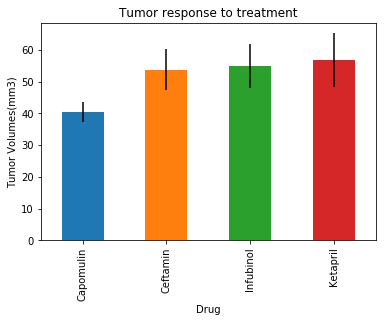

In [11]:
yerr = format_group.loc[:,'Capomulin':'Ketapril'].std()
data =format_group.loc[:,'Capomulin':'Ketapril'].mean()
fig,ax = plt.subplots()
data.plot.bar(ax = ax,yerr = yerr)#before coding the bar(),should put plot.in front of it.
#if I didn't put ax=ax, there is no graph.
#Instead of using mean(),if i just use format_group.loc[:,'Capomulin':'Ketapril'] the error bar didn't show up.
 # Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
ax.set( ylabel='Tumor Volumes(mm3)',title='Tumor response to treatment')
plt.show()


## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic = group_by[['Metastatic Sites']].mean()
# Convert to DataFrame
Metastatic.reset_index(inplace = True)

# Preview DataFrame
Metastatic.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the standard deviation error Met. Site Data Grouped by Drug and Timepoint 
Met_std = group_by[['Metastatic Sites']].sem()
# Convert to DataFrame
Met_std.reset_index(inplace = True)
# Preview DataFrame
Met_std.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
Met_2 = Metastatic.pivot(index='Timepoint',columns = 'Drug',values = 'Metastatic Sites')
# Preview that Reformatting worked
Met_2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


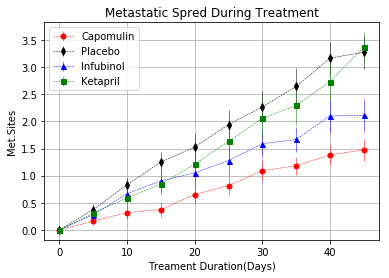

In [17]:
# Generate the Plot (with Error Bars)
fig,ax1 = plt.subplots()
plt.errorbar(Met_2.index,Met_2["Capomulin"],
                yerr =Met_std[Met_std['Drug']=='Capomulin']['Metastatic Sites'],
                marker='o',linestyle='dashed',c='r',ms=5,linewidth=0.5)

plt.errorbar(Met_2.index,Met_2["Placebo"],
                yerr =Met_std[Met_std['Drug']=='Placebo']['Metastatic Sites'],
                marker='d',c='k',linestyle='dashed',ms=5,linewidth=0.5)
plt.errorbar(Met_2.index,Met_2["Infubinol"],
               yerr =Met_std[Met_std['Drug']=='Infubinol']['Metastatic Sites']
               ,marker='^',c='b',linestyle='dashed',ms=5,linewidth=0.5)
plt.errorbar(Met_2.index,Met_2["Ketapril"],
               yerr =Met_std[Met_std['Drug']=='Ketapril']['Metastatic Sites']
               ,marker='s',c='g',linestyle='dashed',ms=5,linewidth=0.5)
plt.legend()
# plt.title("Metastatic Spred During Treatment")
# plt.xlabel("Treament Duration(Days)")
# plt.ylabel("Met.Sites")
ax1.set(xlabel='Treament Duration(Days)',ylabel='Met.Sites',title='Metastatic Spred During Treatment')
plt.grid()
# Save the Figure
plt.savefig('met.png', bbox_inches='tight')

# Show the Figure


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice = group_by[['Mouse ID']].count()
Mice.columns =['Mouse Count']
# Convert to DataFrame
Mice.reset_index(inplace = True)
# Preview DataFrame
Mice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
Mice_2 = Mice.pivot(index = 'Timepoint',columns = 'Drug',values = 'Mouse Count')
# Preview the Data Frame
Mice_2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


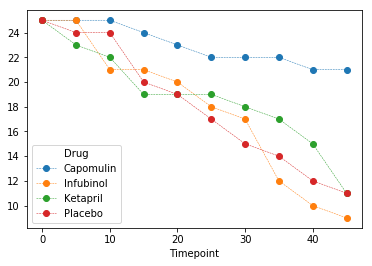

In [21]:
# Generate the Plot (Accounting for percentages)
from itertools import cycle
mrk = ['o', '^', 's', 'd']
color =['r', 'blue', 'green', 'k']
x = Mice_2.index
y = Mice_2.loc[:,['Capomulin','Infubinol','Ketapril', 'Placebo']].values.T
names =['Capomulin','Infubinol','Ketapril', 'Placebo']

Mice_2.loc[:,['Capomulin','Infubinol','Ketapril', 'Placebo']
          ].plot(linestyle = 'dashed',linewidth = 0.5,marker='o')
 
# Save the Figure

# Show the Figure
plt.show()


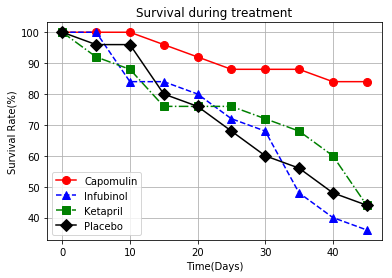

In [22]:
survival_4drugs=Mice_2[['Capomulin','Infubinol','Ketapril','Placebo']]
survival_4drugs.head()
survival_4drugs=survival_4drugs.apply(lambda x:x/25*100)   
ax=survival_4drugs.plot(style=['ro-', 'b^--', 'gs-.', 'kD-'],markersize=8,grid=True,legend=True)# no need color again colors=['r','b','g','k'],
ax.set(xlabel='Time(Days)',ylabel='Survival Rate(%)',title='Survival during treatment')
ax.legend()
 

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
percent_change = (format_group.iloc[9,:]-format_group.iloc[0,:])/format_group.iloc[0,:]*100
# Display the data to confirm
print(percent_change)
print(percent_change.values)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64
[-19.47530267  42.51649186  46.12347173  57.02879469  53.92334713
  51.29796048  47.24117486 -22.32090046  52.08513429  46.57975087]


In [27]:
percent_change.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

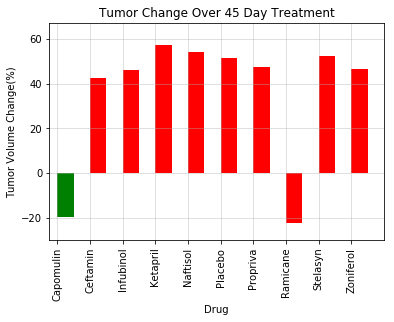

In [45]:
fig,ax=plt.subplots()
colors = []
for i in np.arange(len(percent_change.values)):
    if i>0:
        colors.append('red')
    else:
        colors.append('green')
plt.bar(percent_change.index,percent_change.values,color=colors,width=0.5,align='edge')#np.arange(len(data_list))
plt.gca()
ax.grid(which='major',alpha=0.5)
ax.set(xlabel='Drug',ylabel='Tumor Volume Change(%)',title='Tumor Change Over 45 Day Treatment')
plt.xticks(rotation='vertical')
plt.xlim(-0.25, len(percent_change.index))
plt.ylim(-30, max(percent_change.values) + 10)
plt.show()